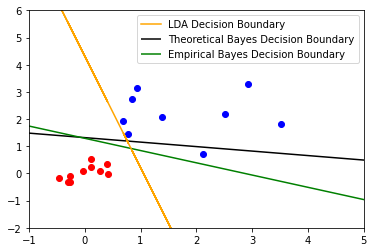

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_blobs


#Problem 2a

#X^1

mean_matrix1 = np.array([2, 2])
std_matrix1 = np.array([[2, -1], [-1, 1]])

mean1 = np.mean(mean_matrix1)
std1 = np.std(std_matrix1)

#X^2
mean_matrix2 = np.array([0, 0])
std_matrix2 = np.array([[1, 0.5], [0.5, 1]])

mean2 = np.mean(mean_matrix2)
std2 = np.std(std_matrix2)




#Generate 10 random normally distributed samples of N(x, X) for both X^1 and X^2
X1 = np.random.normal(loc = mean1, scale = std1, size = (10, 2))
X2 = np.random.normal(loc = mean2, scale = std2, size = (10, 2))

X = [y for x in [X1, X2] for y in x]

#Generate labels for X1 and X2
y1 = [1 for i in range(10)]
y2 = [2 for i in range(10)]

y = [y for x in [y1, y2] for y in x]


#Linear discriminant     

for i in range(10):
    plt.scatter(X1[i][0], X1[i][1], color = 'b')
    plt.scatter(X2[i][0], X2[i][1], color = 'r')


#Get LDA decision boundary
lda = LinearDiscriminantAnalysis()
ldafit = lda.fit(X, y)


lda_intercept = ldafit.intercept_
lda_slope = ldafit.coef_

lda_y = np.dot(lda_slope, np.transpose(X)) + lda_intercept
lda_y = np.reshape(lda_y, (20, 1))
lda_y = lda_y.tolist()

lda_x = []
for i in range(20):
    lda_x.append(X[i][0])

lda_m, lda_b = np.polyfit(lda_x, lda_y, 1)

#Labeling
plt.plot(lda_x, lda_m * lda_x + lda_b, color = 'orange', label = 'LDA Decision Boundary')


#Get Theoretical Bayes Decision Boundary

g_xlim = (-1, 8)
g_ylim = (-1, 5)
g_x, g_y = np.meshgrid(np.linspace(g_xlim[0], g_xlim[1], 71),
                     np.linspace(g_ylim[0], g_ylim[1], 81))
Z = ldafit.predict_proba(np.c_[g_x.ravel(), g_y.ravel()])
Z = Z[:, 1].reshape(g_x.shape)

g_plot = plt.contour(g_x, g_y, Z, [0.5], colors= 'black')

#Labeling
labels = ['Theoretical Bayes Decision Boundary']
for i in range(len(labels)):
    g_plot.collections[i].set_label(labels[i])

#Get Empirical Bayes Decision Boundary

#Generating empirical sample mean/std from existing sample
X1_mean = sum(X1)/len(X1)
X1_std = np.std(X1)

X2_mean = sum(X2)/len(X2)
X2_std = np.std(X2)

X1_new = np.random.normal(loc = X1_mean, scale = X1_std, size = (10, 2))
X2_new = np.random.normal(loc = X2_mean, scale = X2_std, size = (10, 2))

X_new = [y for x in [X1_new, X2_new] for y in x]

lda_new = LinearDiscriminantAnalysis()
ldafit_new = lda.fit(X_new, y)

g_xlim = (-1, 8)
g_ylim = (-1, 5)
g_x, g_y = np.meshgrid(np.linspace(g_xlim[0], g_xlim[1], 71),
                     np.linspace(g_ylim[0], g_ylim[1], 81))
Z = ldafit_new.predict_proba(np.c_[g_x.ravel(), g_y.ravel()])
Z = Z[:, 1].reshape(g_x.shape)

g_plot = plt.contour(g_x, g_y, Z, [0.5], colors= 'green')

#Labeling
labels = ['Empirical Bayes Decision Boundary']
for i in range(len(labels)):
    g_plot.collections[i].set_label(labels[i])




plt.legend()
plt.axis([-1, 5, -2, 6]) 
plt.show()




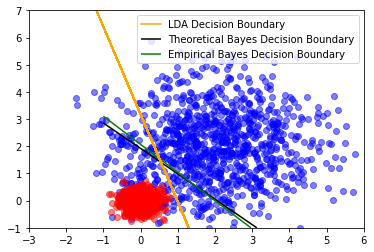

In [39]:
# Problem 2b

#X^1

mean_matrix1 = np.array([2, 2])
std_matrix1 = np.array([[2, -1], [-1, 1]])

mean1 = np.mean(mean_matrix1)
std1 = np.std(std_matrix1)

#X^2
mean_matrix2 = np.array([0, 0])
std_matrix2 = np.array([[1, 0.5], [0.5, 1]])

mean2 = np.mean(mean_matrix2)
std2 = np.std(std_matrix2)

#Generate 10 random normally distributed samples of N(x, X) for both X^1 and X^2
X1 = np.random.normal(loc = mean1, scale = std1, size = (1000, 2))
X2 = np.random.normal(loc = mean2, scale = std2, size = (1000, 2))

X = [y for x in [X1, X2] for y in x]

#Generate labels for X1 and X2
y1 = [1 for i in range(1000)]
y2 = [2 for i in range(1000)]

y = [y for x in [y1, y2] for y in x]


#Linear discriminant     

for i in range(1000):
    plt.scatter(X1[i][0], X1[i][1], color = 'b', alpha = 0.5)
    plt.scatter(X2[i][0], X2[i][1], color = 'r', alpha = 0.5)


#Get LDA decision boundary
lda = LinearDiscriminantAnalysis()
ldafit = lda.fit(X, y)


lda_intercept = ldafit.intercept_
lda_slope = ldafit.coef_

lda_y = np.dot(lda_slope, np.transpose(X)) + lda_intercept
lda_y = np.reshape(lda_y, (2000, 1))
lda_y = lda_y.tolist()

lda_x = []
for i in range(2000):
    lda_x.append(X[i][0])

lda_m, lda_b = np.polyfit(lda_x, lda_y, 1)

plt.plot(lda_x, lda_m * lda_x + lda_b, color = 'orange', label = 'LDA Decision Boundary')


#Get Theoretical Bayes Decision Boundary 

g_xlim = (-1, 8)
g_ylim = (-1, 5)
g_x, g_y = np.meshgrid(np.linspace(g_xlim[0], g_xlim[1], 71),
                     np.linspace(g_ylim[0], g_ylim[1], 81))
Z = ldafit.predict_proba(np.c_[g_x.ravel(), g_y.ravel()])
Z = Z[:, 1].reshape(g_x.shape)

g_plot = plt.contour(g_x, g_y, Z, [0.5], colors= 'black')

#Labeling
labels = ['Theoretical Bayes Decision Boundary']
for i in range(len(labels)):
    g_plot.collections[i].set_label(labels[i])
    
#Get Empirical Bayes Decision Boundary

#Generating empirical sample mean/std from existing sample
X1_mean = sum(X1)/len(X1)
X1_std = np.std(X1)

X2_mean = sum(X2)/len(X2)
X2_std = np.std(X2)

X1_new = np.random.normal(loc = X1_mean, scale = X1_std, size = (1000, 2))
X2_new = np.random.normal(loc = X2_mean, scale = X2_std, size = (1000, 2))

X_new = [y for x in [X1_new, X2_new] for y in x]

lda_new = LinearDiscriminantAnalysis()
ldafit_new = lda.fit(X_new, y)

g_xlim = (-1, 8)
g_ylim = (-1, 5)
g_x, g_y = np.meshgrid(np.linspace(g_xlim[0], g_xlim[1], 71),
                     np.linspace(g_ylim[0], g_ylim[1], 81))
Z = ldafit_new.predict_proba(np.c_[g_x.ravel(), g_y.ravel()])
Z = Z[:, 1].reshape(g_x.shape)

g_plot = plt.contour(g_x, g_y, Z, [0.5], colors= 'green')

#Labeling
labels = ['Empirical Bayes Decision Boundary']
for i in range(len(labels)):
    g_plot.collections[i].set_label(labels[i])



plt.legend()
plt.axis([-3, 6, -1, 7])  
plt.show()


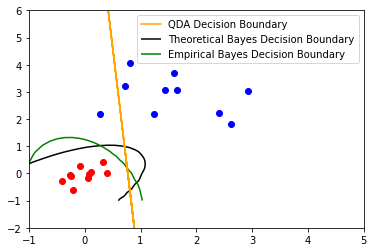

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Problem 3a

#X^1
mean_matrix1 = np.array([2, 2])
std_matrix1 = np.array([[2, -1], [-1, 1]])

mean1 = np.mean(mean_matrix1)
std1 = np.std(std_matrix1)

#X^2
mean_matrix2 = np.array([0, 0])
std_matrix2 = np.array([[1, 0.5], [0.5, 1]])

mean2 = np.mean(mean_matrix2)
std2 = np.std(std_matrix2)

#Generate 10 random normally distributed samples of N(x, X) for both X^1 and X^2
X1 = np.random.normal(loc = mean1, scale = std1, size = (10, 2))
X2 = np.random.normal(loc = mean2, scale = std2, size = (10, 2))

X = [y for x in [X1, X2] for y in x]

#Generate labels for X1 and X2
y1 = [1 for i in range(10)]
y2 = [2 for i in range(10)]

y = [y for x in [y1, y2] for y in x]


#Quadratic discriminant     

for i in range(10):
    plt.scatter(X1[i][0], X1[i][1], color = 'b')
    plt.scatter(X2[i][0], X2[i][1], color = 'r')


#Get QDA Decision Boundary
qda = QuadraticDiscriminantAnalysis(store_covariance = True)
qdafit = qda.fit(X, y)

qdad = LinearDiscriminantAnalysis()
qdadfit = lda.fit(X, y)

qdad_intercept = ldafit.intercept_
qdad_slope = ldafit.coef_

qda_y = np.dot(qdad_slope, np.transpose(X)) + qdad_intercept
qda_y = np.reshape(qda_y, (20, 1))
qda_y = qda_y.tolist()

qda_x = []
for i in range(20):
    qda_x.append(X[i][0])

qda_m, qda_b = np.polyfit(qda_x, qda_y, 1)

plt.plot(qda_x, qda_m * qda_x + qda_b, color = 'orange', label = 'QDA Decision Boundary')

    
#Get Theoretical Bayes Decision Boundary
g_xlim = (-1, 8)
g_ylim = (-1, 5)
g_x, g_y = np.meshgrid(np.linspace(g_xlim[0], g_xlim[1], 71),
                     np.linspace(g_ylim[0], g_ylim[1], 81))
Z = qdafit.predict_proba(np.c_[g_x.ravel(), g_y.ravel()])
Z = Z[:, 1].reshape(g_x.shape)

qda_plot = plt.contour(g_x, g_y, Z, [0.5], colors= 'black')

#Labeling
labels = ['Theoretical Bayes Decision Boundary']
for i in range(len(labels)):
    qda_plot.collections[i].set_label(labels[i])
    
    
#Get Empirical Bayes Decision Boundary

#Generating empirical sample mean/std from existing sample
X1_mean = sum(X1)/len(X1)
X1_std = np.std(X1)

X2_mean = sum(X2)/len(X2)
X2_std = np.std(X2)

X1_new = np.random.normal(loc = X1_mean, scale = X1_std, size = (10, 2))
X2_new = np.random.normal(loc = X2_mean, scale = X2_std, size = (10, 2))

X_new = [y for x in [X1_new, X2_new] for y in x]

qda_new = QuadraticDiscriminantAnalysis()
qdafit_new = qda_new.fit(X_new, y)

g_xlim = (-1, 8)
g_ylim = (-1, 5)
g_x, g_y = np.meshgrid(np.linspace(g_xlim[0], g_xlim[1], 71),
                     np.linspace(g_ylim[0], g_ylim[1], 81))
Z = qdafit_new.predict_proba(np.c_[g_x.ravel(), g_y.ravel()])
Z = Z[:, 1].reshape(g_x.shape)

g_plot = plt.contour(g_x, g_y, Z, [0.5], colors= 'green')

#Labeling
labels = ['Empirical Bayes Decision Boundary']
for i in range(len(labels)):
    g_plot.collections[i].set_label(labels[i])



plt.legend()
plt.axis([-1, 5, -2, 6]) 
plt.show()


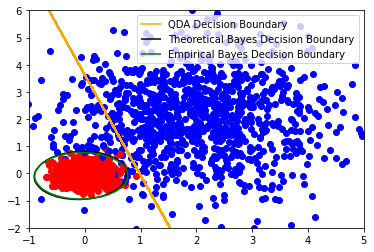

In [11]:
#Problem 3b

#X^1
mean_matrix1 = np.array([2, 2])
std_matrix1 = np.array([[2, -1], [-1, 1]])

mean1 = np.mean(mean_matrix1)
std1 = np.std(std_matrix1)

#X^2
mean_matrix2 = np.array([0, 0])
std_matrix2 = np.array([[1, 0.5], [0.5, 1]])

mean2 = np.mean(mean_matrix2)
std2 = np.std(std_matrix2)

#Generate 10 random normally distributed samples of N(x, X) for both X^1 and X^2
X1 = np.random.normal(loc = mean1, scale = std1, size = (1000, 2))
X2 = np.random.normal(loc = mean2, scale = std2, size = (1000, 2))

X = [y for x in [X1, X2] for y in x]

#Generate labels for X1 and X2
y1 = [1 for i in range(1000)]
y2 = [2 for i in range(1000)]

y = [y for x in [y1, y2] for y in x]


#Quadratic discriminant     

for i in range(1000):
    plt.scatter(X1[i][0], X1[i][1], color = 'b')
    plt.scatter(X2[i][0], X2[i][1], color = 'r')


#Get QDA Decision Boundary
qda = QuadraticDiscriminantAnalysis(store_covariance = True)
qdafit = qda.fit(X, y)

qdad = LinearDiscriminantAnalysis()
qdadfit = lda.fit(X, y)

qdad_intercept = ldafit.intercept_
qdad_slope = ldafit.coef_

qda_y = np.dot(qdad_slope, np.transpose(X)) + qdad_intercept
qda_y = np.reshape(qda_y, (2000, 1))
qda_y = qda_y.tolist()

qda_x = []
for i in range(2000):
    qda_x.append(X[i][0])

qda_m, qda_b = np.polyfit(qda_x, qda_y, 1)

plt.plot(qda_x, qda_m * qda_x + qda_b, color = 'orange', label = 'QDA Decision Boundary')

#Get Theoretical Bayes Decision Boundary
g_xlim = (-1, 8)
g_ylim = (-1, 5)
g_x, g_y = np.meshgrid(np.linspace(g_xlim[0], g_xlim[1], 71),
                     np.linspace(g_ylim[0], g_ylim[1], 81))
Z = qdafit.predict_proba(np.c_[g_x.ravel(), g_y.ravel()])
Z = Z[:, 1].reshape(g_x.shape)

qda_plot = plt.contour(g_x, g_y, Z, [0.5], colors= 'black')

#Labeling
labels = ['Theoretical Bayes Decision Boundary']
for i in range(len(labels)):
    qda_plot.collections[i].set_label(labels[i])
    
    
#Get Empirical Bayes Decision Boundary

#Generating empirical sample mean/std from existing sample
X1_mean = sum(X1)/len(X1)
X1_std = np.std(X1)

X2_mean = sum(X2)/len(X2)
X2_std = np.std(X2)

X1_new = np.random.normal(loc = X1_mean, scale = X1_std, size = (1000, 2))
X2_new = np.random.normal(loc = X2_mean, scale = X2_std, size = (1000, 2))

X_new = [y for x in [X1_new, X2_new] for y in x]

qda_new = QuadraticDiscriminantAnalysis()
qdafit_new = qda_new.fit(X_new, y)

g_xlim = (-1, 8)
g_ylim = (-1, 5)
g_x, g_y = np.meshgrid(np.linspace(g_xlim[0], g_xlim[1], 71),
                     np.linspace(g_ylim[0], g_ylim[1], 81))
Z = qdafit_new.predict_proba(np.c_[g_x.ravel(), g_y.ravel()])
Z = Z[:, 1].reshape(g_x.shape)

g_plot = plt.contour(g_x, g_y, Z, [0.5], colors= 'green')

#Labeling
labels = ['Empirical Bayes Decision Boundary']
for i in range(len(labels)):
    g_plot.collections[i].set_label(labels[i])



plt.legend()
plt.axis([-1, 5, -2, 6]) 
plt.show()